<a href="https://colab.research.google.com/github/chamuda-arangalla/Face-mask-detection-/blob/main/Face_mask_detection_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face mask detection by CNN model


In [1]:
!pip install kaggle

In [2]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Import face mask dataset

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [8]:
#importing dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow #create new window and display image
from PIL import Image  #image processing library
from sklearn.model_selection import train_test_split

In [9]:
#get data
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])


['with_mask_3326.jpg', 'with_mask_776.jpg', 'with_mask_3604.jpg', 'with_mask_2841.jpg', 'with_mask_3176.jpg']
['without_mask_288.jpg', 'without_mask_2779.jpg', 'without_mask_2154.jpg', 'without_mask_1106.jpg', 'without_mask_272.jpg']


In [10]:
#count data
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating labels for the two class of images**

1.   With mask --> 1
2.   Without mask --> 0



In [11]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
labels = with_mask_labels + without_mask_labels

In [14]:
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the images**

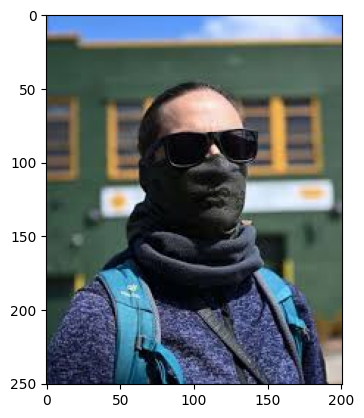

In [21]:
#displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2.jpg')
imgplot = plt.imshow(img)
plt.show()

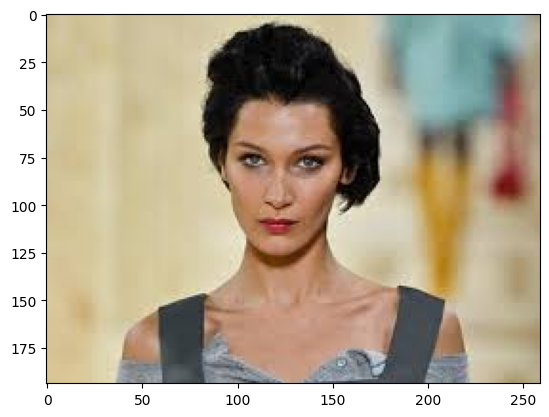

In [28]:
#displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1126.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1.   Resize the images
2.   Convert the images to numpy arrays



In [31]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

#with mask data
for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


#withot mask data
without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [32]:
type(data)

list

In [35]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]], dtype=uint8)
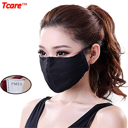

In [36]:
data[0]

In [37]:
type(data[0])

numpy.ndarray

In [38]:
data[0].shape

(128, 128, 3)

In [39]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [40]:
#check type of x and y
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [41]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**